In [2]:
import pandas as pd
from IPython.display import display, HTML
from lr.text_processing.util import pre_process_nli_df
from lr.training.util import filter_df_by_label
import numpy as np
import matplotlib.pyplot as plt


In [3]:
original_path = "data/snli/train.csv" 
transformed_path = "data/snli/train_p_h_syn_noun.csv"

df = pd.read_csv(original_path)
df = filter_df_by_label(df.dropna()).reset_index(drop=True)
pre_process_nli_df(df)
df_t = pd.read_csv(transformed_path)

248
53.1% +/- 8.6%


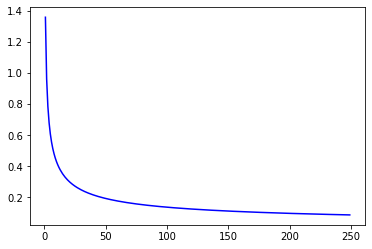

In [55]:
def e(alpha, n):
    return np.sqrt(np.log(2/alpha) / (2*n))

e95 = lambda n: e(0.05, n)
x = np.array(range(1,250))

plt.plot(x, e95(x),color="blue");
p = np.random.uniform(0.5,1)
eps = e95(x)
n = eps.argmin()
e = eps[n]


print(n)
print("{:.1%} +/- {:.1%}".format(p, e))

In [56]:
check = [3009,
         31179,
         61075,
         74197,
         88711,
         131562,
         143926,
         170392,
         174061,
         184178,
         192313,
         238926,
         251704,
         279122,
         301305,
         312990,
         322922,
         329975,
         347770,
         363445,
         368980,
         371078,
         401002,
         413867,
         454719,
         459003,
         486563,
         497558,
         513146,
         519575,
         534719,
         18808,
        124977,
        169880,
        172129,
        184697,
        195049,
        232501,
        325831,
        338546,
        369476,
        375972,
        421782,
        442005,
        460692,
        502553,
        24243, 113960, 
         180045, 182916, 
         205379, 256923,
         279396, 343511,
         347215, 450100,
         345301, 354199,
         290594, 47779,
         170368, 310142,
         194644, 119556,
         385811, 255560,
         157335, 425041,
         24430, 271501, 
         516492, 12435,
         100415, 200758, 166057]

In [57]:
check.sort()
# df = df.loc[check]
# df_t = df_t.loc[check]
print(len(check))

75


In [ ]:
samples = 1000
good = []
bad = []
count = 0

for _ in range(samples):
    count += 1
    original = df.sample()
    id_ = original.index[0]
    print("\noriginal\n")
    display(HTML(original.to_html()))
    modified = df_t.loc[id_].to_frame().transpose()
    print("\nmodified\n")
    display(HTML(modified.to_html()))
    print("\ndecide\n")
    decision = input()
    if decision == "y":
        good.append(id_)
    elif decision =="n":
        bad.append(id_)
    else:
        break


original



,premise,hypothesis,label
2037,two dogs playing on carpet,the dogs are in kennels,contradiction



modified



,premise,hypothesis,label
2037,two dogs playing on rug,the dogs are in doghouse,contradiction



decide



## CI

In [9]:
n =  count-1
g = len(good) / n
print("count = {}\n".format(count))
print("good pct = {:.3f}\n".format(g))

l = g - e95(n)
u = g + e95(n) 
print("good 95% pct CI = ({:.3f}, {:.3f})".format(l,u))


count = 10

good pct = 0.667

good 95% pct CI = (0.214, 1.119)


## IDS

In [10]:
ids = bad + good
ids

[441089, 487058, 276216, 190233, 417019, 406006, 279750, 501783, 542249]